In [3]:
# Libraries
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image

import pickle
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Check our folder and import the model with best validation accuracy
loaded_best_model = keras.models.load_model("/content/drive/MyDrive/TemanBagaya/model_08-0.90.h5")

# Custom function to load and predict label for the image
def predict(img_rel_path):
    # Import Image from the path with size of (300, 300)
    img = image.load_img(img_rel_path, target_size=(300, 300))

    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the Loaded Image
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    # Get the Predicted Label for the loaded Image
    p = loaded_best_model.predict(img[np.newaxis, ...])

    # Label array
    labels = {0: 'Celana Jeans', 1: 'Celana Jogger ', 2: 'Celana Kargo', 3: 'Celana Trouser',
              4: 'Crewneck', 5: 'Kaos Oversized', 6: 'Kaos Stripe', 7: 'Kemeja Flannel',
              8: 'Sandal Trial', 9: 'Sepatu Athletics', 10: 'Sepatu Canvas', 11: 'Sepatu High-top Basketball'}

    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")

    classes=[]
    prob=[]

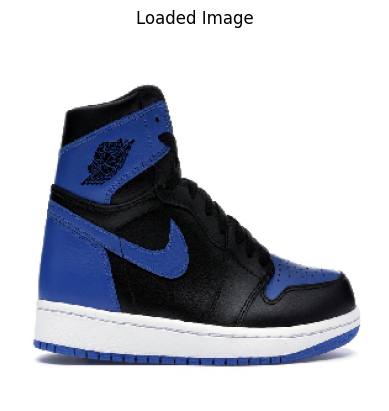

1/1 [==============================] - 10s 10s/step


Maximum Probability:  0.9643802
Classified: Sepatu High-top Basketball 




In [5]:
predict("/content/drive/MyDrive/TemanBagaya/Test/Sepatu High-top Basketball/Air-Jordan-1-Retro-Black-Blue-2017_1.jpg")